In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# This ensures plots created are displayed in this notebook 
%matplotlib inline

In [ ]:
import random 
# Ensures tree created is easy to read and understand
from pprint import pprint

In [ ]:
# Load and Prepare Data
# Format of the data: 
# Last Column of the data frame must contain the label,
# and it must be called "label".
# There should be no missing values in the data frame!


# The Pandas module is used for working with tabular data. It allows us to work with data in table form, such as in CSV or SQL database formats. We can also create tables of our own, and edit or add columns or rows to tables. Pandas provides us with some powerful objects like DataFrames and Series which are very useful for working with and analyzing data.

# The Numpy module is mainly used for working with numerical data. It provides us with a powerful object known as an Array. With Arrays, we can perform mathematical operations on multiple values in the Arrays at the same time, and also perform operations between different Arrays, similar to matrix operations.

# Last, but not least, the Matplotlib module is used for data visualization. It provides functionality for us to draw charts and graphs, so that we can better understand and present the data visually.

# Indeed, pandas provides high level data manipulation tools built on top of NumPy. NumPy by itself is a fairly low-level tool, and will be very much similar to using MATLAB. pandas on the other hand provides rich time series functionality, data alignment, NA-friendly statistics, groupby, merge and join methods, and lots of other conveniences.


In [ ]:
df = pd.read_csv("Iris.csv")
# Drop the 'Id' column as provides no useful info.
df = df.drop("Id", axis = 1)
# Rename the 'Species' column to 'label'
df = df.rename(columns = {"Species" : "label"})
df.head()

In [ ]:
# Check no missing values in the dataframe
# States for us that there are 150 entries in total, with 
# each column having 150 non-null items
df.info()

In [ ]:
# Train Test Split
def train_test_split(df, test_size):
    # We want to keep our code flexible, where we see if the user passes in the # of 
    # rows for the test_size versus a proportion for the test_size
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    # So if test_size is 0.10, and df is len 150, test_size becomes 15.
    # Round in case we encounter a float after multiplying

    indices = df.index.tolist()
    # Now create the test_df, randomly from these indices
    test_indices = random.sample(population = indices, k = test_size)

    # Use the test_indices, which is an array of size test_size with indices
    # that represent those we want to create our test_df with 
    test_df = df.loc[test_indices]

    # Do the same for train indices, use df.drop
    # This omits the rows indicated by test_indices
    train_df = df.drop(test_indices)
    return train_df, test_df

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size = 20)

In [ ]:
test_df.head()

In [ ]:
# We will use a numpy array here, as it's faster than a pandas df.
# To get a numpy 2D array from a pandas df, use the .values attribute 
data = train_df.values 
# Get first 0-5 rows.
data[0:5]

In [ ]:
### Data pure - Check if a partition contains one class (pure) or if 
# it contains multiple classes (not pure)
def check_purity(data):
    # Get all the labels for each row at the last col
    label_column = data[:, -1]
    # Find number of distinct classes in array 
    unique_classes = np.unique(label_column)

    # if there's one class, data is pure
    if len(unique_classes) == 1:
        return True 
    else:
        return False 


In [ ]:
check_purity(train_df.values)

In [ ]:
# Returns true as only one class with this condition
check_purity(train_df[train_df.PetalWidthCm < 0.8].values)

In [ ]:
### Classify 

def classify_data(data):
    # Get all the labels for each row at the last col
    label_column = data[:, -1]
    # Determine which class appears most often 
    # The return_counts returns two arrays, first with unique vals, second with counts
    # of how many times those unique vals occurred. 
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True)

    # Get index of most occurring element. This returns '0' here
    # as first element is most occurring. Then use this '0'
    # to dereference unique_classes
    index = counts_unique_classes.argmax()
    # set the classification label
    classification = unique_classes[index]
    return classification


In [ ]:
classify_data(train_df[(train_df.PetalWidthCm > 0.8) & (train_df.PetalWidthCm < 2.0)].values)

In [ ]:
# Potential Splits
# data is 2D numpy array
def get_potential_splits(data):
    # use 3 to reference PetalWidthCm and the value being a list
    # to reference potential splits for PetalWidthCm
    potential_splits = {}
    _, n_columns = data.shape 

    for column_index in range(n_columns - 1): 

        potential_splits[column_index] = []
        values = data[:, column_index]
        # get the unique values for splitting purposes
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]

                potential_split = (current_value + previous_value) / 2

                potential_splits[column_index].append(potential_split)
    return potential_splits

In [93]:
potential_splits = get_potential_splits(train_df.values)
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


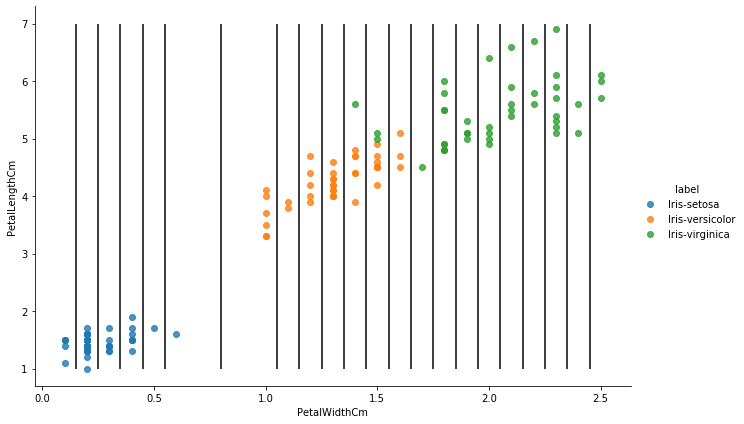

In [98]:
# fit_reg = False removes line of best fit
# hue argument differentiates the flowers by label
sns.lmplot(data = train_df, x = "PetalWidthCm", y = "PetalLengthCm", hue = 'label', fit_reg = False, size = 6, aspect = 1.5)

plt.vlines(x = potential_splits[3], ymin = 1, ymax = 7)

In [ ]:
sns.lmplot(data = train_df, x = "petal_width", y = "petal_length")